In [2]:
import pandas as pd
import matplotlib.pyplot as plt # para visualização de informações

# Reading and visualizing data

In [3]:
#Lembre de fazer upload dele nos arquivos do colab
PATH = "/content/iliad_sentiments.csv"

In [5]:
df = pd.read_csv(PATH)  
df

,greek text,english text,neutral,positive,negative,narrator,y,class
0,"Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...",Apollo’s priest to th’ Argive fleet doth bring,0.375,0.500,0.125,0.0,"[0.375, 0.5, 0.125, 0.0]",positive
1,"ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...","Gifts for his daughter, pris’ner to the king;",0.125,0.250,0.625,0.0,"[0.125, 0.25, 0.625, 0.0]",negative
2,και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...,For which her tender’d freedom he entreats;,0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
3,"παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...","But, being dismiss’d with contumelious threats,",0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
4,και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...,"At Phœbus’ hands, by vengeful pray’r, he seeks",0.500,0.125,0.375,0.0,"[0.5, 0.125, 0.375, 0.0]",neutral
...,...,...,...,...,...,...,...,...
606,κει που 'χε χτίσει στον καθένα τους παλάτι ο κ...,"Address’d for sleep, where ev’ry one, with art...",0.375,0.625,0.000,0.0,"[0.375, 0.625, 0.0, 0.0]",positive
607,"ο ξακουστός τεχνίτης Ήφαιστος, με τη σοφή του ...",By heav’n’s great both-foot-halting God a sev’...,0.250,0.750,0.000,0.0,"[0.25, 0.75, 0.0, 0.0]",positive
608,"Κι ο Δίας ο Ολύμπιος, ό αστραπόχαρος, στην κλί...","Ev’n he to sleep went, by whose hand heav’n is...",0.250,0.750,0.000,0.0,"[0.25, 0.75, 0.0, 0.0]",positive
609,"εκεί που ως τώρα πάντα, ως του 'ρχονταν ύπνος ...","High Jove, where he had us’d to rest when swee...",0.125,0.875,0.000,0.0,"[0.125, 0.875, 0.0, 0.0]",positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   greek text    611 non-null    object 
 1   english text  611 non-null    object 
 2   neutral       611 non-null    float64
 3   positive      611 non-null    float64
 4   negative      611 non-null    float64
 5   narrator      611 non-null    float64
 6   y             611 non-null    object 
 7   class         611 non-null    object 
dtypes: float64(4), object(4)
memory usage: 38.3+ KB


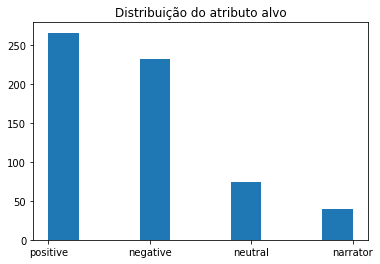

In [7]:
## Distribuição do atributo alvo
plt.hist(df['class'])
plt.title("Distribuição do atributo alvo")
plt.show()

# Pre processing

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

**Target dict**

In [26]:
id2target = {
    0: "negative",
    1: "positive",
    2: "neutral",
    3: "narrator",
}

In [27]:
target2id = {id2target[target_id]: target_id for target_id in id2target}
target2id

{'negative': 0, 'positive': 1, 'neutral': 2, 'narrator': 3}

**X & Y list**

In [121]:
X = df["greek text"].tolist()
y = np.array([target2id[y] for y in df["class"].tolist()]) 

**Holdout traind and test**

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Functions to greek text

Não está funcionando

In [115]:
!pip install cltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from cltk.stem.lemma import LemmaReplacer
#from cltk.corpus.utils.formatter import cltk_normalize

In [120]:
from cltk.stem.lemma import LemmaReplacer
sentence = 'λόγων λογίων'
lemmatizer = LemmaReplacer('greek')
lemmatizer.lemmatize(sentence, return_raw=True)

FileNotFoundError: ignored

## TF-IDF

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**Bag of Words**

In [124]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
X_train_counts.shape

(488, 1552)

**TF-IDF**

In [125]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
X_train_tfidf.shape

(488, 1552)

### Testar com lematização e stemming

Sugestões que encontrei:
- https://legacy.cltk.org/en/latest/greek.html#lemmatization
- https://github.com/kpech21/Greek-Stemmer

# SBERT

In [126]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('lighteternal/stsb-xlm-r-greek-transfer')

In [128]:
X_train_sbert = model.encode(X_train)
X_test_sbert = model.encode(X_test)

# UMAP

Diminuir a dimensionalidade do SBERT

In [129]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import umap

In [131]:
X_umap_train = umap.UMAP().fit_transform(X_train_sbert)
X_umap_test = umap.UMAP().fit_transform(X_test_sbert)

# Models

In [132]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Naive Bayes

In [133]:
from sklearn.naive_bayes import MultinomialNB

In [134]:
#TF-IDF

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

==== TF-IDF ====
Accuracy: 48%
Recall: 24.035087719298247%
Precision: 19.0%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
#SBERT

text_clf = MultinomialNB()
text_clf.fit(X_train_sbert, y_train)
predicted = text_clf.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

ValueError: ignored

In [ ]:
#SBERT > UMAP

text_clf = MultinomialNB()
text_clf.fit(X_umap_train, y_train)
predicted = text_clf.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#TF-IDF

text_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)),
])

text_tree.fit(X_train, y_train)
predicted = text_tree.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT

text_tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
text_tree.fit(X_train_sbert, y_train)
predicted = text_tree.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
text_tree.fit(X_umap_train, y_train)
predicted = text_tree.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
text_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5)),
])

text_knn.fit(X_train, y_train)
predicted = text_knn.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

Normalizar e diminuir a dimensionalidade

In [ ]:
#SBERT

text_knn = KNeighborsClassifier(n_neighbors=5)
text_knn.fit(X_train_sbert, y_train)
predicted = text_knn.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_knn = KNeighborsClassifier(n_neighbors=5)
text_knn.fit(X_umap_train, y_train)
predicted = text_knn.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")